<a href="https://colab.research.google.com/github/sberniz/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv

--2020-06-11 03:07:04--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv’

bootcampers.csv     100%[===================>]   2.38M  10.1MB/s    in 0.2s    

2020-06-11 03:07:04 (10.1 MB/s) - ‘bootcampers.csv’ saved [2499384/2499384]



In [3]:
df = pd.read_csv('bootcampers.csv')
df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample1 = df.sample(20, random_state=42)
sample2 = df.sample(200,random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [6]:
sample1_conv_sal_mean = sample1['ConvertedSalary'].mean()
sample2_conv_sal_mean = sample2['ConvertedSalary'].mean()
print("Sample 1 Converted Salary Mean: ",sample1_conv_sal_mean)
print("Sample 2 Converted Salary Mean: ",sample2_conv_sal_mean)

Sample 1 Converted Salary Mean:  55752.2
Sample 2 Converted Salary Mean:  68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

Although I would be incline to trust sample 2 more because Developers are known to have a high salary, I wouldn't trust either because it is just two mean from a sample, and there could be variations (standard error) from the entire population, and that information is not given. Non technical person would not know which of the values is more trustworthy

---



**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

No, these value do not communicate enough to know how much sampling error, the standard error needs to be calculated for that. 


**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We would say for example. the Salary mean and say Plus or minus either a percentage or for exmple +/- $2000

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
#function to calculate CI intervals
def calc_ci(sample,confidence = .5):
  sample = np.array(sample) #converts sample to numpy array
  x_bar = sample.mean() #calculate the sample mean. 
  s = np.std(sample,ddof=1) #S is for standard deviation
  n = len(sample) #length of sample size, how many people from pop
  t = stats.t.ppf((1+confidence) / 2, n-1) #t statistic to confidence level and degrees of freedom
  std_err = s / np.sqrt(n) #standard error deviding standard deviation by square root of sample size
  mrg_err = std_err * t #t statistic * standard error
  #Lower and upper bound = x_bar +/- marging of error (mrg_err)
  lower = x_bar - mrg_err
  upper = x_bar + mrg_err
  return(lower,x_bar,upper)





In [8]:
lower,x_bar,upper = calc_ci(sample1['ConvertedSalary'])
print("Sample 1 CI (Confidence Interval)")
print("Mean ", x_bar)
print("Lower",lower)
print("Upper",upper)
print("Margin of error",(upper - x_bar))

Sample 1 CI (Confidence Interval)
Mean  55752.2
Lower 49198.977707842074
Upper 62305.42229215792
Margin of error 6553.222292157923


In [9]:
lower,x_bar,upper = calc_ci(sample2['ConvertedSalary'])
print("Sample 2 CI (Confidence Interval)")
print("Mean ", x_bar)
print("Lower",lower)
print("Upper",upper)
print("Margin of error",(upper - x_bar))

Sample 2 CI (Confidence Interval)
Mean  68551.255
Lower 65824.24312862297
Upper 71278.26687137704
Margin of error 2727.0118713770353


**2) Which confidence interval is wider and why?**

The first confidence interval is weider because the sample is smaller, as we learned before, smaller sample tend to have bigger standard errors, hence also bigger confidence interval

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [10]:
lower1,x_bar1,upper1 = calc_ci(sample1['ConvertedSalary'])
print("Sample 2 CI (Confidence Interval)")
print("Mean ", x_bar1)
print("Lower",lower1)
print("Upper",upper1)
print("Margin of error",(upper1 - x_bar1))

Sample 2 CI (Confidence Interval)
Mean  55752.2
Lower 49198.977707842074
Upper 62305.42229215792
Margin of error 6553.222292157923


In [11]:
lower2,x_bar2,upper2 = calc_ci(sample2['ConvertedSalary'])
print("Sample 2 CI (Confidence Interval)")
print("Mean ", x_bar2)
print("Lower",lower2)
print("Upper",upper2)
print("Margin of error",(upper2 - x_bar2))

Sample 2 CI (Confidence Interval)
Mean  68551.255
Lower 65824.24312862297
Upper 71278.26687137704
Margin of error 2727.0118713770353


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

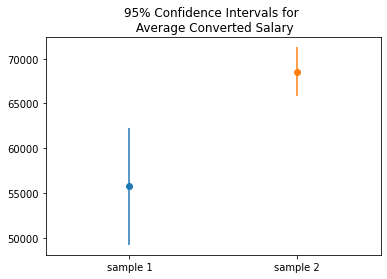

In [12]:
plt.errorbar(x=0, y=x_bar1,yerr=(upper1-x_bar1), fmt='o')
plt.errorbar(x=1, y=x_bar2, yerr=(upper2-x_bar2), fmt='o')
plt.title("95% Confidence Intervals for \n Average Converted Salary")
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5,1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

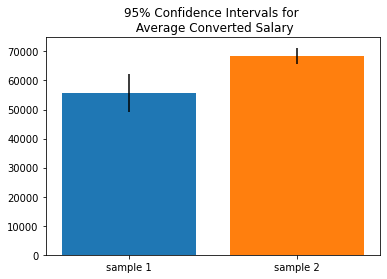

In [13]:
plt.bar(x=0, height=x_bar1,yerr=(upper1-x_bar1))
plt.bar(x=1, height=x_bar2, yerr=(upper2-x_bar2))
plt.title("95% Confidence Intervals for \n Average Converted Salary")
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5,1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [14]:
lowerdf,x_bardf,upperdf = calc_ci(df['ConvertedSalary'])
print("Entire Data Base(Confidence Interval)")
print("Mean ", x_bardf)
print("Lower",lowerdf)
print("Upper",upperdf)
print("Margin of error",(upperdf - x_bardf))

Entire Data Base(Confidence Interval)
Mean  73453.40420137631
Lower 72712.51396129745
Upper 74194.29444145517
Margin of error 740.8902400788647


IT is more precise with ~$740 margin of error. 

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision means when all samples are close to each other, while 'accuracy' is when the samples are very close to the entire population. 

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

 95% confidence interval is an estimate  of the possible values of a population mean.  it means that 95% of the calculated intervals will contain the population mean. 


# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [15]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-11 03:08:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-06-11 03:08:45 (285 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [18]:
#Read values and add column headers
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df_house = pd.read_csv('house-votes-84.data', header=None, names=column_headers)

print(df_house.shape)
df_house.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [25]:
df_house = df_house.replace({'y':1,'n':0,'?':np.NaN})
df_house = df_house.dropna()
df_house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [26]:
republicans = df_house[df_house['party'] == 'republican']
democrats = df_house[df_house['party'] == 'democrat']
print(republicans.head())
print(democrats.head())

         party  handicapped-infants  ...  duty-free  south-africa
8   republican                  0.0  ...        0.0           1.0
28  republican                  1.0  ...        0.0           1.0
30  republican                  0.0  ...        0.0           0.0
33  republican                  0.0  ...        0.0           1.0
35  republican                  0.0  ...        0.0           0.0

[5 rows x 17 columns]
       party  handicapped-infants  ...  duty-free  south-africa
5   democrat                  0.0  ...        1.0           1.0
19  democrat                  1.0  ...        1.0           1.0
23  democrat                  1.0  ...        1.0           1.0
25  democrat                  1.0  ...        1.0           1.0
26  democrat                  1.0  ...        1.0           1.0

[5 rows x 17 columns]


In [39]:

for i, issue in enumerate(republicans):
  if issue != 'party':
    lower, x_bar, upper = calc_ci(republicans[issue])    
    print("\nIssue: ",issue,"Confidence Interval")
    print("Mean: ",x_bar)
    print("Lower: ",lower)
    print("Upper: ", upper)
    print("Margin of error", (upper - lower))


Issue:  handicapped-infants Confidence Interval
Mean:  0.21296296296296297
Lower:  0.18617674653771762
Upper:  0.2397491793882083
Margin of error 0.05357243285049068

Issue:  water-project Confidence Interval
Mean:  0.4722222222222222
Lower:  0.43955888847040564
Upper:  0.5048855559740388
Margin of error 0.0653266675036332

Issue:  budget Confidence Interval
Mean:  0.1574074074074074
Lower:  0.13357965111817566
Upper:  0.18123516369663917
Margin of error 0.04765551257846351

Issue:  physician-fee-freeze Confidence Interval
Mean:  0.9907407407407407
Lower:  0.9844741709398531
Upper:  0.9970073105416283
Margin of error 0.012533139601775156

Issue:  el-salvador-aid Confidence Interval
Mean:  0.9537037037037037
Lower:  0.9399556377426146
Upper:  0.9674517696647928
Margin of error 0.027496131922178257

Issue:  religious-groups Confidence Interval
Mean:  0.8703703703703703
Lower:  0.8483934954079198
Upper:  0.892347245332821
Margin of error 0.0439537499249012

Issue:  anti-satellite-ban Con

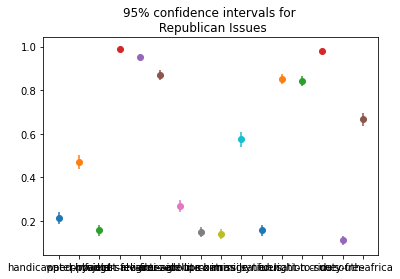

In [100]:
# plt.errorbar
CI = []
xxticks = []
xlabels = []
for i, issue in enumerate(republicans):
  if issue != 'party':
    CI.append(list(calc_ci(republicans[issue])))
    plt.errorbar(x=i -1 , y=CI[i - 1 ][1], yerr=(CI[i- 1][2]-CI[i -1][1]), fmt='o')
    xxticks.append(i - 1)
    xlabels.append(issue)
    

plt.title('95% confidence intervals for \n Republican Issues')
plt.xticks(ticks=xxticks, labels=xlabels)
plt.width
#plt.xlim(-.5, 1.5)
plt.show()